#### TS including a three-component noncovalent complex from SMILES, create ORCA input files, CSEARCH with CREST

###### Step 1: creating SMILES with predefined atom numbers and setting constrains

RDKit WARNING: [12:16:32] Enabling RDKit 2019.09.3 jupyter extensions
[12:16:32] Enabling RDKit 2019.09.3 jupyter extensions


[Cl-:9].[F:4][C:5]([C:6]([H:12])([H:13])[H:14])([C:7]([H:15])([H:16])[H:17])[C:8]([H:18])([H:19])[H:20].[O:3]([H:10])[H:11]


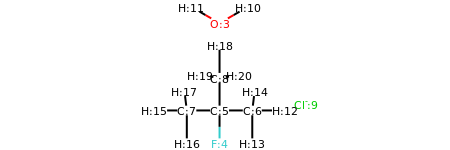

In [1]:
import os, glob
from pathlib import Path
from rdkit import Chem                                                                                                                                                         
from aqme.csearch import csearch
from aqme.qprep import qprep

smi = 'O.FC(C)(C)C.[Cl-]'
mol = Chem.MolFromSmiles(smi)
mol = Chem.AddHs(mol)
for i,atom in enumerate(mol.GetAtoms()):
    atom.SetAtomMapNum(i+3) 
# mapped SMILES to use in CSEARCH
smi_new = Chem.MolToSmiles(mol)

print(smi_new)
mol

In [2]:
# based on the atom numbers above, I choose the constraints for my TS:
# 1) Bond between atoms 4 and 5 with a distance of 1.8 A
# 2) Bond between atoms 5 and 9 with a distance of 1.8 A
constraits_dist = [[4,5,1.8],[5,9,1.8]]

# 3) Angle between atoms 4, 5 and 9 of 180 degrees
constraits_angle = [[4,5,9,180]]

###### Step 2: doing CSEARCH

In [3]:
# run CSEARCH conformational sampling, specifying:
# 1) Mapped SMILES string (smi=smi_new)
# 2) Name for the output SDF files (name='TS-example')
# 3) RDKit sampling (program='crest')
# 4) Include CREGEN post-analysis (cregen=True)
# 5) Specify that this a TS calculation (ts_complex=True)
# 6) Define distance constraints (constraints_dist=constraits_dist)
# 7) Define angle constraints (constraints_angle=constraits_angle)
csearch(smi=smi_new,
        name='TS-example',program='crest',cregen=True,crest_nci=True,
        constraints_dist=constraits_dist,constraints_angle=constraits_angle)

Warning! Option: [ crest_nci : True ] provided but no option exists, try the online documentation to see available options for each module.
AQME v 1.2 2022/09/02 12:16:32 
Citation: AQME v 1.2, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T. M.; Paton, R. S., 2022. https://github.com/jvalegre/aqme



Starting CSEARCH with 1 job(s) (SDF, XYZ, CSV, etc. files might contain multiple jobs/structures inside)



   ----- TS-example -----


Time CSEARCH: 424.03 seconds




###### Step 3: Writing Gaussian input files with the SDF files obtained from CSEARCH

In [6]:
# set SDF filenames and directory where the new com files will be created
sdf_rdkit_files = glob.glob(f'CSEARCH/crest/*.sdf')

# run QPREP input files generator, with:
# 1) Files to convert (files=file)
# 2) QM program for the input (program='gaussian')
# 3) Keyword line for the Gaussian inputs (qm_input='wb97xd/6-31+G* opt=(calcfc,ts,noeigen) freq')
# 4) Memory to use in the calculations (mem='24GB')
# 5) Processors to use in the calcs (nprocs=8)
qprep(files=sdf_rdkit_files,program='gaussian',
        qm_input='wb97xd/6-31+G* opt=(calcfc,ts,noeigen) freq',mem='24GB',nprocs=8)

AQME v 1.2 2022/09/02 12:16:32 
Citation: AQME v 1.2, Alegre-Requena, J. V.; Sowndarya, S.; Perez-Soto, R.; Alturaifi, T. M.; Paton, R. S., 2022. https://github.com/jvalegre/aqme


o  isopent-water-complex_crest successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/examples-updated/Example_workflows/CSEARCH_CMIN_conformer_generation/QCALC

o  TS-example_crest successfully processed at /home/svss/Project-DBcg-Debug/aqme2_20220329/examples-updated/Example_workflows/CSEARCH_CMIN_conformer_generation/QCALC


Time QPREP: 0.66 seconds


